In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_array = np.genfromtxt("A2Q2Data_train.csv", delimiter=",")
test_array = np.genfromtxt("A2Q2Data_test.csv", delimiter=",")

# a = np.array([[1,2,3],[4,5,6]])
# b = a[:,:1]
# print(b)

x = train_array[:,:100]
y = train_array[:,100:]

x_test = test_array[:,:100]
y_test = test_array[:,100:]

x_train = x[:400,:]
y_train = y[:400,:]

x_valid = x[400:,:]
y_valid = y[400:,:]

# print(x.shape)
# print(y.shape)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# print(x_valid.shape)
# print(y_valid.shape)


In [4]:
#Training model with 80% of training data
lmbd = np.array([0.00001,0.00002,0.00003,0.00004,0.00005,0.00006,0.00007,0.00008,0.00009,0.0001])
W = np.zeros(100)
xtx = x_train.T.dot(x_train)
xtx_inv = np.linalg.inv(xtx) 
xty = x_train.T.dot(y_train)

W_ml = (xtx_inv).dot(xty)
W_ml = W_ml.flatten()

a = np.zeros(100)
    
final_Wt = np.array([a])
for l in lmbd:
    cur_W = np.array([])
    for i in W:
        cur_W = np.append(cur_W,i)
    all_W = np.array([])
    pre_lse = 99999
    for t in range(500):
#         print(l)
        delta_W = xtx_inv.dot(cur_W) - xty.flatten()#(dX1) vector -> delta_W
        #flatten() -> convert 2d -> 1d
        cur_W = cur_W - l*(delta_W)#(dX1) vector -> cur_W
        if(t == 0):
#             print(t)
            lse = np.linalg.norm(cur_W-W_ml)
#             print(pre_lse)
#             print(lse)
        else:
#             print(t)
            if(lse<=pre_lse):
                all_W = np.array([])
                for i in cur_W:
                    all_W = np.append(all_W,i)
                pre_lse = lse
                lse = np.linalg.norm(cur_W-W_ml)
#                 print(pre_lse)
#                 print(lse)
            else:
                break
#     print(all_W)
    final_Wt = np.vstack([final_Wt,all_W])
# print(final_Wt)
# print(final_Wt.shape)
#         print(all_W.shape)
#         print(lse)
    
#     final_Wt = np.vstack([final_Wt,all_w[lse.argmin()]])
# print(final_Wt)

In [5]:
#Cross Validation step
xtx = x_valid.T.dot(x_valid)
xtx_inv = np.linalg.inv(xtx) 
xty = x_valid.T.dot(y_valid)

W_ml = (xtx_inv).dot(xty)
W_ml = W_ml.flatten()


lse1 = np.array([])
for l in range(10):
    lse1 = np.append(lse1,np.linalg.norm(final_Wt[l+1]-W_ml))
# print(lse1)

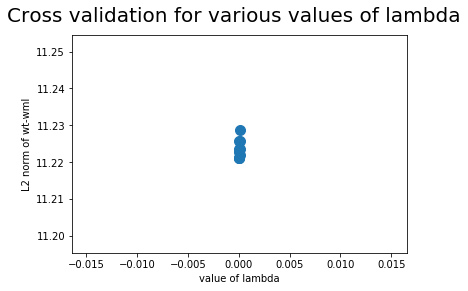

In [6]:
plt.suptitle('Cross validation for various values of lambda', fontsize=20)
plt.ylabel("L2 norm of wt-wml")
plt.xlabel("value of lambda")
plt.scatter(lmbd[:], lse1[:], s=100)
plt.show()

In [7]:
#Select Required W_r
index = lse1.argmin()
W_r = final_Wt[index+1]

In [10]:
#ML error calculation
xtx = x_test.T.dot(x_test)
xtx_inv = np.linalg.inv(xtx) 
xty = x_test.T.dot(y_test)

W_ml = (xtx_inv).dot(xty)
W_ml = W_ml.flatten()

error_ml = np.array([])
for i in range(y_test.size):
    error_ml = np.append(error_ml,np.linalg.norm(x_test[i].dot(W_ml)-y_test[i]))
# print(error_ml)

In [11]:
error_r = np.array([])
for i in range(y_test.size):
    error_r = np.append(error_r,np.linalg.norm(x_test[i].dot(W_r)-y_test[i]))
# print(error_r)

In [12]:
n_test = np.array([],dtype ='int8')
for i in range(y_test.size):
    n_test = np.append(n_test,i+1)

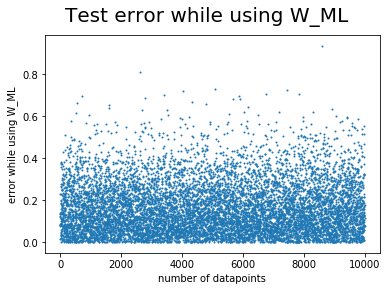

In [13]:
plt.suptitle('Test error while using W_ML', fontsize=20)
plt.ylabel("error while using W_ML")
plt.xlabel("number of datapoints")
plt.scatter(n_test[:], error_ml[:], s=1)
plt.show()

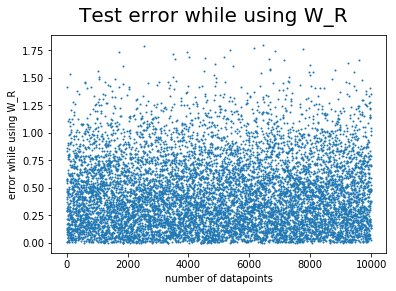

In [14]:
plt.suptitle('Test error while using W_R', fontsize=20)
plt.ylabel("error while using W_R")
plt.xlabel("number of datapoints")
plt.scatter(n_test[:], error_r[:], s=1)
plt.show()